In [5]:
pip install vega_datasets

Note: you may need to restart the kernel to use updated packages.


In [11]:
jupyter notebook --version

SyntaxError: invalid syntax (<ipython-input-11-aa3869950bb9>, line 1)

In [9]:
alt.__version__

'3.2.0'

In [8]:
import vega; print(vega.__version__)

2.5.0


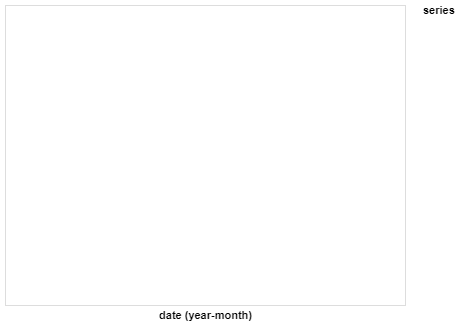

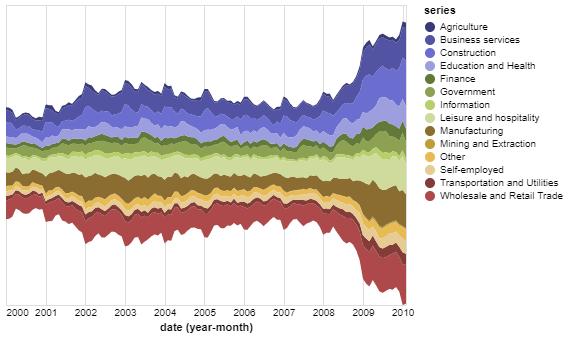

In [12]:
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')
# from IPython.display import display
# alt.renderers.enable('default')

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

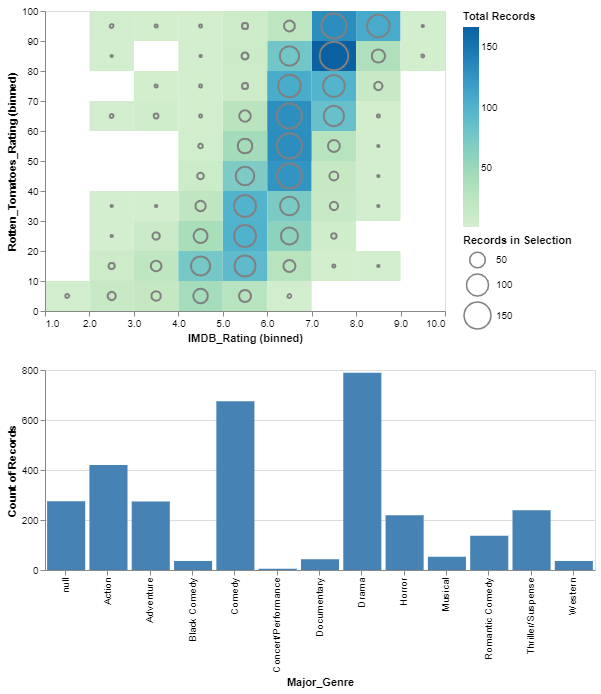

In [13]:
source = data.movies.url

pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(data.movies.url).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Major_Genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)

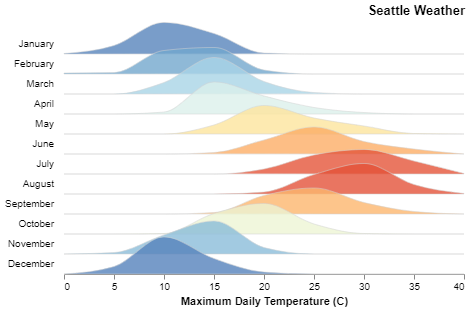

In [14]:
source = data.seattle_weather.url

step = 20
overlap = 1

alt.Chart(source).transform_timeunit(
    Month='month(date)'
).transform_joinaggregate(
    mean_temp='mean(temp_max)', groupby=['Month']
).transform_bin(
    ['bin_max', 'bin_min'], 'temp_max'
).transform_aggregate(
    value='count()', groupby=['Month', 'mean_temp', 'bin_min', 'bin_max']
).transform_impute(
    impute='value', groupby=['Month', 'mean_temp'], key='bin_min', value=0
).mark_area(
    interpolate='monotone',
    fillOpacity=0.8,
    stroke='lightgray',
    strokeWidth=0.5
).encode(
    alt.X('bin_min:Q', bin='binned', title='Maximum Daily Temperature (C)'),
    alt.Y(
        'value:Q',
        scale=alt.Scale(range=[step, -step * overlap]),
        axis=None
    ),
    alt.Fill(
        'mean_temp:Q',
        legend=None,
        scale=alt.Scale(domain=[30, 5], scheme='redyellowblue')
    ),
    alt.Row(
        'Month:T',
        title=None,
        header=alt.Header(labelAngle=0, labelAlign='right', format='%B')
    )
).properties(
    bounds='flush', title='Seattle Weather', height=step
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).configure_title(
    anchor='end'
)

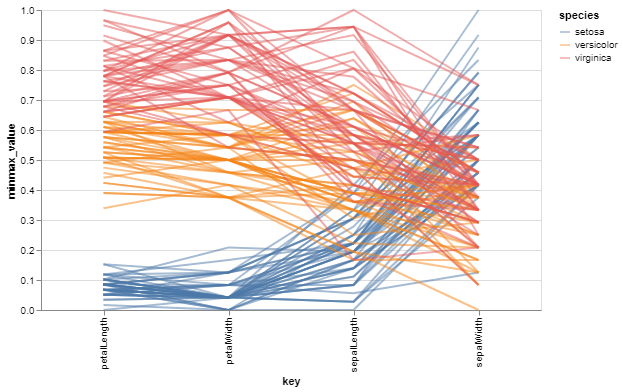

In [15]:
import altair as alt
from vega_datasets import data
from altair import datum

source = data.iris()

alt.Chart(source).transform_window(
    index='count()'
).transform_fold(
    ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
).transform_joinaggregate(
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line().encode(
    x='key:N',
    y='minmax_value:Q',
    color='species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)

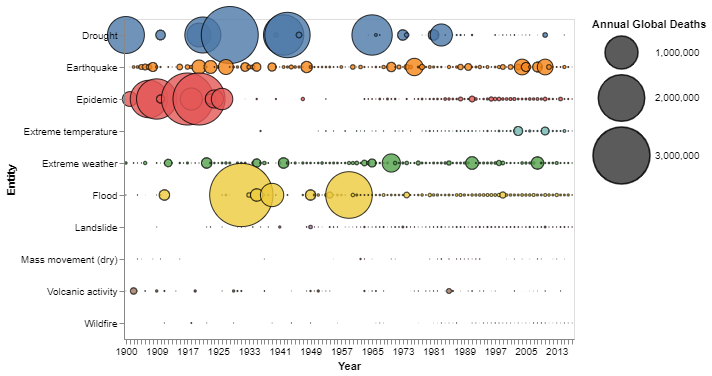

In [16]:
import altair as alt
from vega_datasets import data

source = data.disasters.url

alt.Chart(source).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('Year:O', axis=alt.Axis(labelAngle=0)),
    alt.Y('Entity:N'),
    alt.Size('Deaths:Q',
        scale=alt.Scale(range=[0, 4000]),
        legend=alt.Legend(title='Annual Global Deaths')
    ),
    alt.Color('Entity:N', legend=None)
).properties(
    width=450,
    height=320
).transform_filter(
    alt.datum.Entity != 'All natural disasters'
)

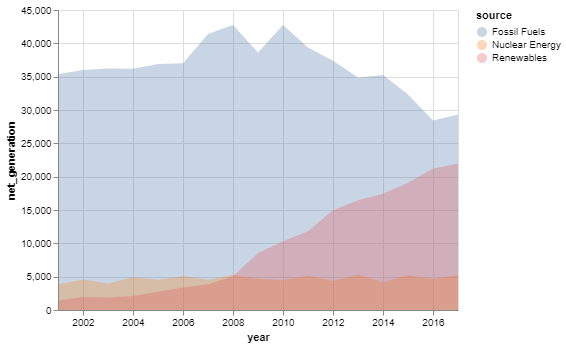

In [18]:

source = data.iowa_electricity()

alt.Chart(source).mark_area(opacity=0.3).encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack=None),
    color="source:N"
)


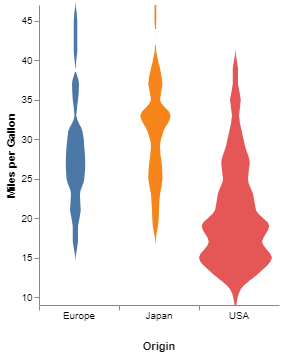

In [19]:
import altair as alt
from altair import datum
from vega_datasets import data

source = data.cars()

alt.Chart(source).transform_filter(
    datum.Miles_per_Gallon > 0
).transform_bin(
    ['bin_max', 'bin_min'], field='Miles_per_Gallon', bin=alt.Bin(maxbins=20)
).transform_calculate(
    binned=(datum.bin_max + datum.bin_min) / 2
).transform_aggregate(
    value_count='count()', groupby=['Origin', 'binned']
).transform_impute(
    impute='value_count', groupby=['Origin'], key='binned', value=0
).mark_area(
    interpolate='monotone',
    orient='horizontal'
).encode(
    x=alt.X(
        'value_count:Q',
        title=None,
        stack='center',
        axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True),
    ),
    y=alt.Y('binned:Q', bin='binned', title='Miles per Gallon'),
    color=alt.Color('Origin:N', legend=None),
    column=alt.Column(
        'Origin:N',
        header=alt.Header(
            titleOrient='bottom',
            labelOrient='bottom',
            labelPadding=0,
        ),
    ),
).properties(
    width=80
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

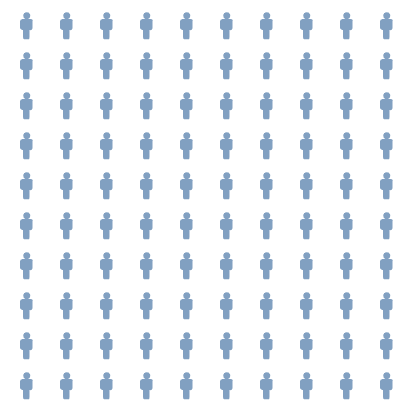

In [20]:
import altair as alt
import pandas as pd

data = pd.DataFrame([dict(id=i) for i in range(1, 101)])

person = (
    "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 "
    "-0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 "
    "0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 "
    "0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 "
    "0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 "
    "-0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 "
    "-0.6 -0.4 -0.6z"
)

alt.Chart(data).transform_calculate(
    row="ceil(datum.id/10)"
).transform_calculate(
    col="datum.id - datum.row*10"
).mark_point(
    filled=True,
    size=50
).encode(
    x=alt.X("col:O", axis=None),
    y=alt.Y("row:O", axis=None),
    shape=alt.ShapeValue(person)
).properties(
    width=400,
    height=400
).configure_view(
    strokeWidth=0
)

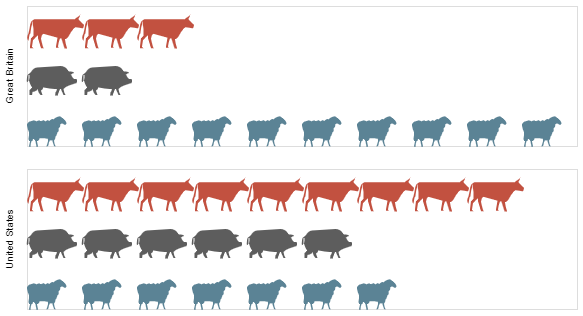

In [21]:
import altair as alt
import pandas as pd

source = pd.DataFrame([
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'cattle'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'pigs'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'Great Britain', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'cattle'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'pigs'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'},
      {'country': 'United States', 'animal': 'sheep'}
    ])

domains = ['person', 'cattle', 'pigs', 'sheep']

shape_scale = alt.Scale(
    domain=domains,
    range=[
        'M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z',
        'M4 -2c0 0 0.9 -0.7 1.1 -0.8c0.1 -0.1 -0.1 0.5 -0.3 0.7c-0.2 0.2 1.1 1.1 1.1 1.2c0 0.2 -0.2 0.8 -0.4 0.7c-0.1 0 -0.8 -0.3 -1.3 -0.2c-0.5 0.1 -1.3 1.6 -1.5 2c-0.3 0.4 -0.6 0.4 -0.6 0.4c0 0.1 0.3 1.7 0.4 1.8c0.1 0.1 -0.4 0.1 -0.5 0c0 0 -0.6 -1.9 -0.6 -1.9c-0.1 0 -0.3 -0.1 -0.3 -0.1c0 0.1 -0.5 1.4 -0.4 1.6c0.1 0.2 0.1 0.3 0.1 0.3c0 0 -0.4 0 -0.4 0c0 0 -0.2 -0.1 -0.1 -0.3c0 -0.2 0.3 -1.7 0.3 -1.7c0 0 -2.8 -0.9 -2.9 -0.8c-0.2 0.1 -0.4 0.6 -0.4 1c0 0.4 0.5 1.9 0.5 1.9l-0.5 0l-0.6 -2l0 -0.6c0 0 -1 0.8 -1 1c0 0.2 -0.2 1.3 -0.2 1.3c0 0 0.3 0.3 0.2 0.3c0 0 -0.5 0 -0.5 0c0 0 -0.2 -0.2 -0.1 -0.4c0 -0.1 0.2 -1.6 0.2 -1.6c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 0 -2.7 -0.2 -2.7c-0.1 0 -0.4 2 -0.4 2c0 0 0 0.2 -0.2 0.5c-0.1 0.4 -0.2 1.1 -0.2 1.1c0 0 -0.2 -0.1 -0.2 -0.2c0 -0.1 -0.1 -0.7 0 -0.7c0.1 -0.1 0.3 -0.8 0.4 -1.4c0 -0.6 0.2 -1.3 0.4 -1.5c0.1 -0.2 0.6 -0.4 0.6 -0.4z',
        'M1.2 -2c0 0 0.7 0 1.2 0.5c0.5 0.5 0.4 0.6 0.5 0.6c0.1 0 0.7 0 0.8 0.1c0.1 0 0.2 0.2 0.2 0.2c0 0 -0.6 0.2 -0.6 0.3c0 0.1 0.4 0.9 0.6 0.9c0.1 0 0.6 0 0.6 0.1c0 0.1 0 0.7 -0.1 0.7c-0.1 0 -1.2 0.4 -1.5 0.5c-0.3 0.1 -1.1 0.5 -1.1 0.7c-0.1 0.2 0.4 1.2 0.4 1.2l-0.4 0c0 0 -0.4 -0.8 -0.4 -0.9c0 -0.1 -0.1 -0.3 -0.1 -0.3l-0.2 0l-0.5 1.3l-0.4 0c0 0 -0.1 -0.4 0 -0.6c0.1 -0.1 0.3 -0.6 0.3 -0.7c0 0 -0.8 0 -1.5 -0.1c-0.7 -0.1 -1.2 -0.3 -1.2 -0.2c0 0.1 -0.4 0.6 -0.5 0.6c0 0 0.3 0.9 0.3 0.9l-0.4 0c0 0 -0.4 -0.5 -0.4 -0.6c0 -0.1 -0.2 -0.6 -0.2 -0.5c0 0 -0.4 0.4 -0.6 0.4c-0.2 0.1 -0.4 0.1 -0.4 0.1c0 0 -0.1 0.6 -0.1 0.6l-0.5 0l0 -1c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 -0.7 -1.2 -0.6 -1.4c0.1 -0.1 0.1 -1.1 0.1 -1.1c0 0 -0.2 0.1 -0.2 0.1c0 0 0 0.9 0 1c0 0.1 -0.2 0.3 -0.3 0.3c-0.1 0 0 -0.5 0 -0.9c0 -0.4 0 -0.4 0.2 -0.6c0.2 -0.2 0.6 -0.3 0.8 -0.8c0.3 -0.5 1 -0.6 1 -0.6z',
        'M-4.1 -0.5c0.2 0 0.2 0.2 0.5 0.2c0.3 0 0.3 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.4 -0.2c0.1 0 0.2 0.2 0.4 0.1c0.2 0 0.2 -0.2 0.4 -0.3c0.1 0 0.1 -0.1 0.4 0c0.3 0 0.3 -0.4 0.6 -0.4c0.3 0 0.6 -0.3 0.7 -0.2c0.1 0.1 1.4 1 1.3 1.4c-0.1 0.4 -0.3 0.3 -0.4 0.3c-0.1 0 -0.5 -0.4 -0.7 -0.2c-0.3 0.2 -0.1 0.4 -0.2 0.6c-0.1 0.1 -0.2 0.2 -0.3 0.4c0 0.2 0.1 0.3 0 0.5c-0.1 0.2 -0.3 0.2 -0.3 0.5c0 0.3 -0.2 0.3 -0.3 0.6c-0.1 0.2 0 0.3 -0.1 0.5c-0.1 0.2 -0.1 0.2 -0.2 0.3c-0.1 0.1 0.3 1.1 0.3 1.1l-0.3 0c0 0 -0.3 -0.9 -0.3 -1c0 -0.1 -0.1 -0.2 -0.3 -0.2c-0.2 0 -0.3 0.1 -0.4 0.4c0 0.3 -0.2 0.8 -0.2 0.8l-0.3 0l0.3 -1c0 0 0.1 -0.6 -0.2 -0.5c-0.3 0.1 -0.2 -0.1 -0.4 -0.1c-0.2 -0.1 -0.3 0.1 -0.4 0c-0.2 -0.1 -0.3 0.1 -0.5 0c-0.2 -0.1 -0.1 0 -0.3 0.3c-0.2 0.3 -0.4 0.3 -0.4 0.3l0.2 1.1l-0.3 0l-0.2 -1.1c0 0 -0.4 -0.6 -0.5 -0.4c-0.1 0.3 -0.1 0.4 -0.3 0.4c-0.1 -0.1 -0.2 1.1 -0.2 1.1l-0.3 0l0.2 -1.1c0 0 -0.3 -0.1 -0.3 -0.5c0 -0.3 0.1 -0.5 0.1 -0.7c0.1 -0.2 -0.1 -1 -0.2 -1.1c-0.1 -0.2 -0.2 -0.8 -0.2 -0.8c0 0 -0.1 -0.5 0.4 -0.8z'
    ]
)

color_scale = alt.Scale(
    domain=domains,
    range=['rgb(162,160,152)', 'rgb(194,81,64)', 'rgb(93,93,93)', 'rgb(91,131,149)']
)

alt.Chart(source).mark_point(filled=True, opacity=1, size=100).encode(
    alt.X('x:O', axis=None),
    alt.Y('animal:O', axis=None),
    alt.Row('country:N', header=alt.Header(title='')),
    alt.Shape('animal:N', legend=None, scale=shape_scale),
    alt.Color('animal:N', legend=None, scale=color_scale),
).transform_window(
    x='rank()',
    groupby=['country', 'animal']
).properties(width=550, height=140)

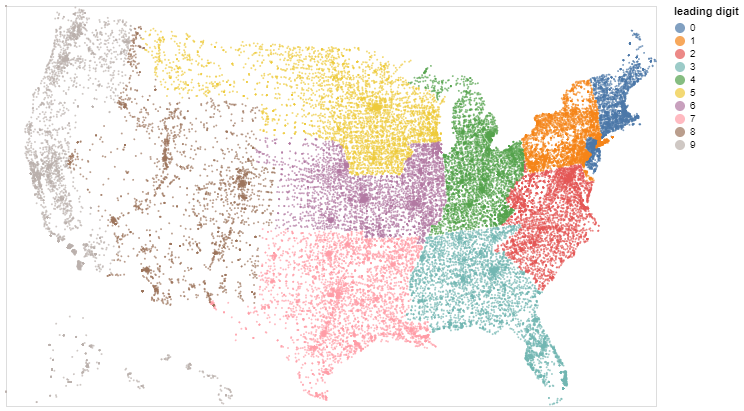

In [22]:
import altair as alt
from vega_datasets import data

# Since the data is more than 5,000 rows we'll import it from a URL
source = data.zipcodes.url

alt.Chart(source).transform_calculate(
    "leading digit", alt.expr.substring(alt.datum.zip_code, 0, 1)
).mark_circle(size=3).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color='leading digit:N',
    tooltip='zip_code:N'
).project(
    type='albersUsa'
).properties(
    width=650,
    height=400
)

In [23]:
#https://github.com/JasonKessler/scattertext#installation
pip install scattertext

Note: you may need to restart the kernel to use updated packages.


In [1]:
import scattertext as st
import spacy
from pprint import pprint

convention_df = st.SampleCorpora.ConventionData2012.get_data()
convention_df.iloc[0]

party                                               democrat
speaker                                         BARACK OBAMA
text       Thank you. Thank you. Thank you. Thank you so ...
Name: 0, dtype: object

In [2]:
convention_df.head(3)

,party,speaker,text
0,democrat,BARACK OBAMA,Thank you. Thank you. Thank you. Thank you so ...
1,democrat,MICHELLE OBAMA,"Thank you so much. Tonight, I am so thrilled a..."
2,democrat,RICHARD DURBIN,Thank you. It is a singular honor to be here t...


In [27]:
nlp = spacy.load("en_core_web_md")
corpus = st.CorpusFromPandas(convention_df, 
                             category_col='party', 
                             text_col='text',
                             nlp=nlp).build()
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))
['obama',
 'romney',
 'barack',
 'mitt',
 'obamacare',
 'biden',
 'romneys',
 'hardworking',
 'bailouts',
 'autoworkers']

['obama', 'romney', 'barack', 'mitt', 'obamacare', 'biden', 'romneys', 'hardworking', 'bailouts', 'autoworkers']


['obama',
 'romney',
 'barack',
 'mitt',
 'obamacare',
 'biden',
 'romneys',
 'hardworking',
 'bailouts',
 'autoworkers']

In [28]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Democratic Score'] = corpus.get_scaled_f_scores('democrat')
pprint(list(term_freq_df.sort_values(by='Democratic Score', ascending=False).index[:10]))
['auto',
 'america forward',
 'auto industry',
 'insurance companies',
 'pell',
 'last week',
 'pell grants',
 "women 's",
 'platform',
 'millionaires']

['middle class',
 'forward',
 'class',
 'middle',
 'the middle',
 'pay',
 'medicare',
 'education',
 'health',
 'president obama']


['auto',
 'america forward',
 'auto industry',
 'insurance companies',
 'pell',
 'last week',
 'pell grants',
 "women 's",
 'platform',
 'millionaires']

In [29]:
term_freq_df['Republican Score'] = corpus.get_scaled_f_scores('republican')
pprint(list(term_freq_df.sort_values(by='Republican Score', ascending=False).index[:10]))
['big government',
 "n't build",
 'mitt was',
 'the constitution',
 'he wanted',
 'hands that',
 'of mitt',
 '16 trillion',
 'turned around',
 'in florida']

['government',
 'administration',
 'business',
 'can do',
 'success',
 'story',
 'unemployment',
 'freedom',
 'paul',
 'do better']


['big government',
 "n't build",
 'mitt was',
 'the constitution',
 'he wanted',
 'hands that',
 'of mitt',
 '16 trillion',
 'turned around',
 'in florida']

In [30]:
#file:///C:/Users/lilyx/Convention-Visualization.html
html = st.produce_scattertext_explorer(corpus,
         category='democrat',
         category_name='Democratic',
         not_category_name='Republican',
         width_in_pixels=1000,
         metadata=convention_df['speaker'])
open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

1664662

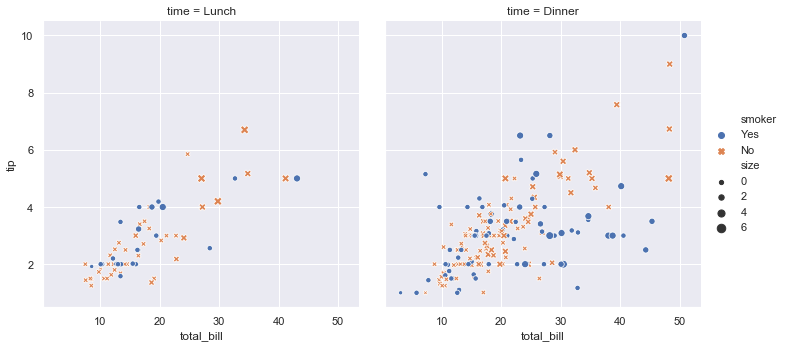

In [32]:
import seaborn as sns
sns.set()
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);


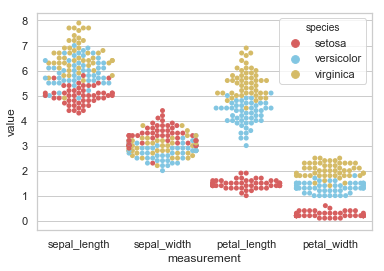

In [33]:
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=iris)

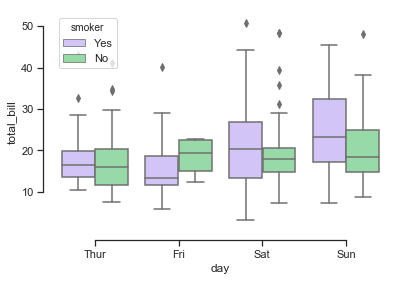

In [34]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

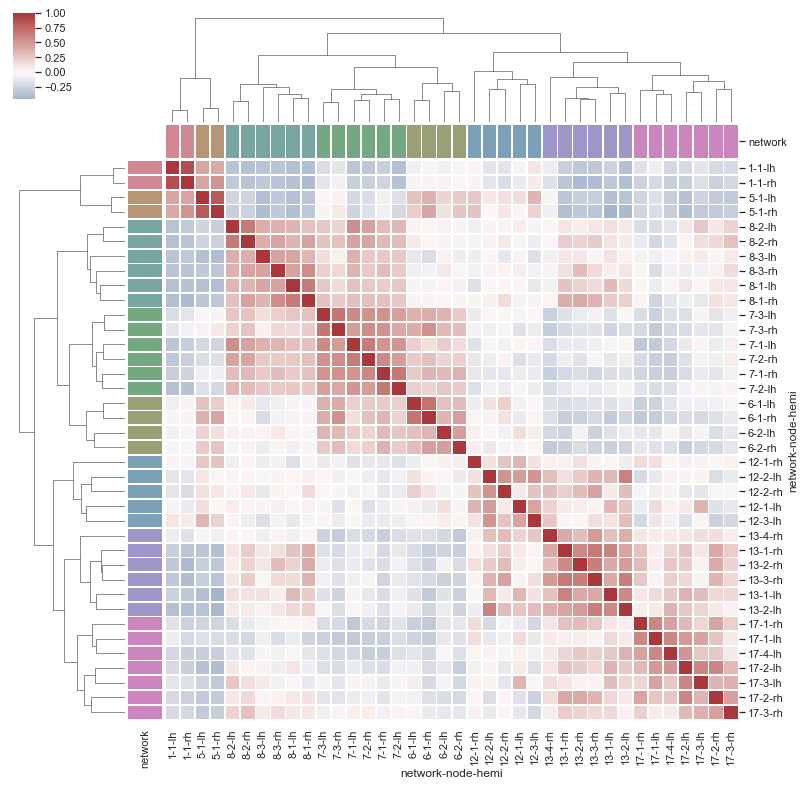

In [35]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

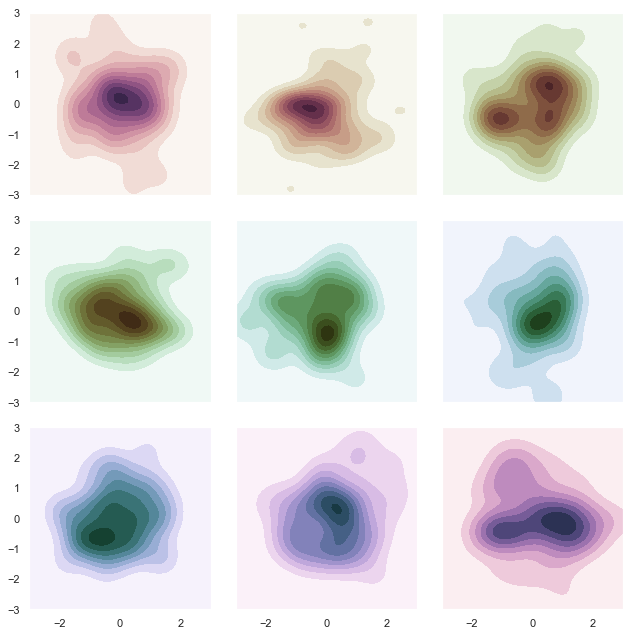

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
rs = np.random.RandomState(50)

# Set up the matplotlib figure
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)

# Rotate the starting point around the cubehelix hue circle
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # Create a cubehelix colormap to use with kdeplot
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)

    # Generate and plot a random bivariate dataset
    x, y = rs.randn(2, 50)
    sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=ax)
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()

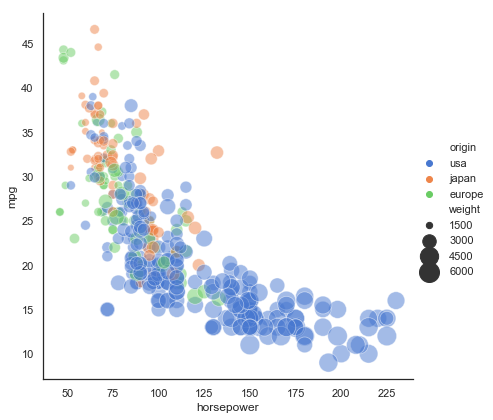

In [37]:
import seaborn as sns
sns.set(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

In [ ]:
conda install -c plotly plotly chart-studio

In [ ]:
import json, urllib
import plotly.plotly as py
import pandas as pd
import numpy as np
scottish_df = pd.read_csv('scottish-votes.csv')
scottish_df.head()
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  scottish_df['Node, Label'].dropna(axis=0, how='any'),
      color = scottish_df['Color']
    ),
    link = dict(
      source = scottish_df['Source'].dropna(axis=0, how='any'),
      target = scottish_df['Target'].dropna(axis=0, how='any'),
      value = scottish_df['Value'].dropna(axis=0, how='any'),
      color = scottish_df['Link Color'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Scottish Referendum Voters who now want Independence",
    height = 772,
    font = dict(
      size = 10
    ),    
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)